In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('vaccination_tweets.csv')

In [3]:
df.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [4]:
# df.describe(include='all')
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.978000e+03,2.978000e+03,2978.000000,2978.000000,2978.000000,2978.000000
mean,1.342831e+18,5.656931e+04,1152.344191,13957.998993,1.720618,11.461048
std,3.280097e+15,4.407986e+05,2349.444225,43744.648078,12.166154,76.235857
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339765e+18,1.160000e+02,165.000000,358.250000,0.000000,0.000000
50%,1.342136e+18,5.800000e+02,457.500000,1681.000000,0.000000,1.000000
75%,1.346100e+18,2.561750e+03,1191.750000,9630.250000,1.000000,5.000000
max,1.348233e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [5]:
df.isnull().sum()

id                    0
user_name             0
user_location       613
user_description    162
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            775
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [6]:
df.shape

(2978, 16)

In [7]:
df.user_verified.value_counts()

False    2580
True      398
Name: user_verified, dtype: int64

# ____________________ Data Visualisation ___________________________

## Types of account

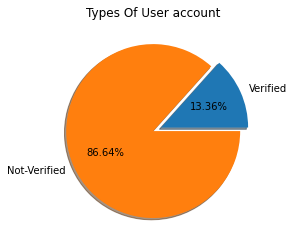

In [8]:
user = df['user_verified'].value_counts().to_dict()
user['Verified'] = user.pop(True)
user['Not-Verified'] = user.pop(False)

plt.figure(figsize=(4,4))
plt.title("Types Of User account")
plt.pie(x=user.values(), labels=user.keys(), autopct='%1.2f%%', shadow=True, explode = [0.1, 0])
plt.show()

## User source(device) used for tweets

In [9]:
sours = df.source.value_counts()[:5]

In [10]:
sours.index

Index(['Twitter for iPhone', 'Twitter Web App', 'Twitter for Android',
       'TweetDeck', 'Twitter for iPad'],
      dtype='object')

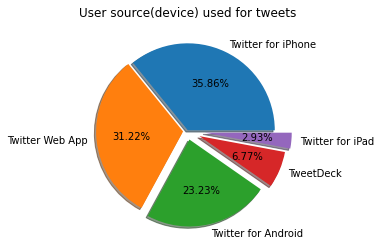

In [11]:
plt.figure(figsize=(4,4))
plt.title("User source(device) used for tweets")
plt.pie(x=sours.values, labels=sours.index, autopct='%1.2f%%', shadow=True, explode = [0.01,0.05,0.1,0.15,0.2])
plt.show()

## Top 20 users with highest number of tweets

In [38]:
user_tweet = df.user_name.value_counts()[:20]
user_tweet

Whtrslugcaviiersong#dontstayhomeandcatchcovid19    30
Medical Study Blog                                 29
Khaleej Times                                      26
Simon Hodes ⬅️2m➡️ 😷                               25
Dr.Krutika Kuppalli                                22
New Straits Times                                  22
ILKHA                                              19
Sue Reeve ♥️🧡💛💚💙💜🇪🇺🇪🇺🏳️‍🌈🏳️‍🌈                      18
🕷Financial Bear 3.5%                               17
Marc Siegel MD                                     16
Gulf News                                          16
Opoyi                                              13
Post-Polio News (ppn)                              12
LatestLY                                           11
🚶🏻Curtis S. Chin                                   11
Tamer Yazar                                        11
حسن سجواني 🇦🇪 Hassan Sajwani                       10
The Peninsula Qatar                                10
Financial Mirror            

In [39]:
# plt.figure(figsize=(10,5))
# sns.countplot(y='user_name', data=df, order=df['user_name'].value_counts().index[:15])
# plt.xlabel('Number of Tweets', weight='bold')
# plt.ylabel('User Name', weight='bold')
# plt.show()


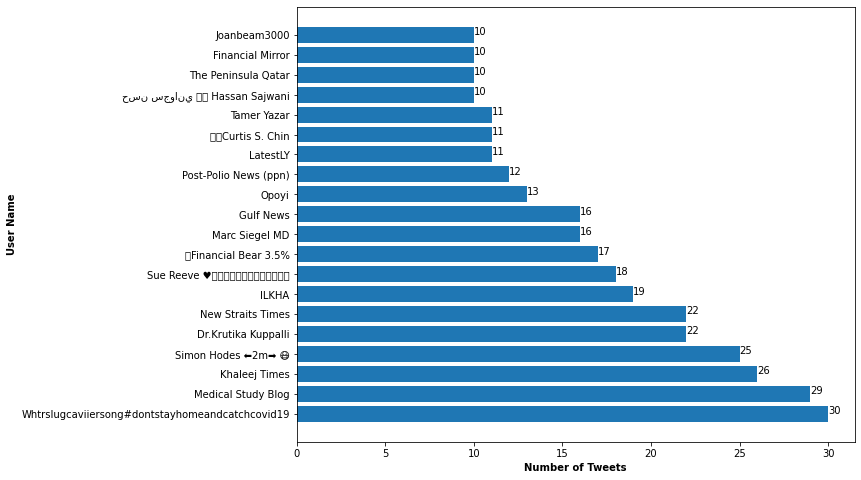

In [40]:
plt.figure(figsize=(10,8))
plt.xlabel('Number of Tweets', weight='bold')
plt.ylabel('User Name', weight='bold')
plt.barh(user_tweet.index, user_tweet.values)
for index, value in enumerate(user_tweet):
    plt.text(value, index, str(value))

# Top 20 Location with highest number of User

In [67]:
user_location = df.user_location.value_counts()[:20]
user_location

India                             49
London, England                   42
United Arab Emirates              42
United Kingdom                    34
Email:talksavailable@gmail.com    30
Malaysia                          29
Canada                            27
Dubai, United Arab Emirates       25
GP Partner, Watford               25
Mumbai, India                     24
London                            23
United States                     21
Türkiye                           19
New Delhi, India                  19
England, United Kingdom           18
Atlanta, GA                       18
Glasgow environs.                 18
Global                            17
#KeepFightingMichael              17
London, UK                        15
Name: user_location, dtype: int64

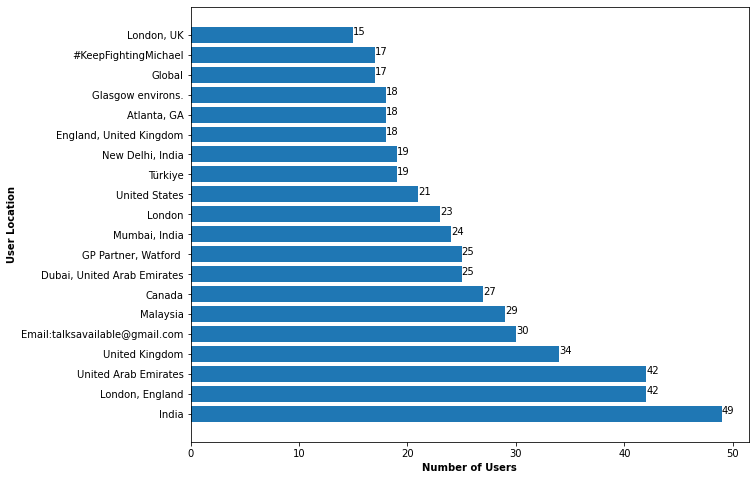

In [69]:
plt.figure(figsize=(10,8))
plt.xlabel('Number of Users', weight='bold')
plt.ylabel('User Location', weight='bold')
plt.barh(user_location.index, user_location.values)
for index, value in enumerate(user_location):
    plt.text(value, index, str(value))

# Getting Corellation

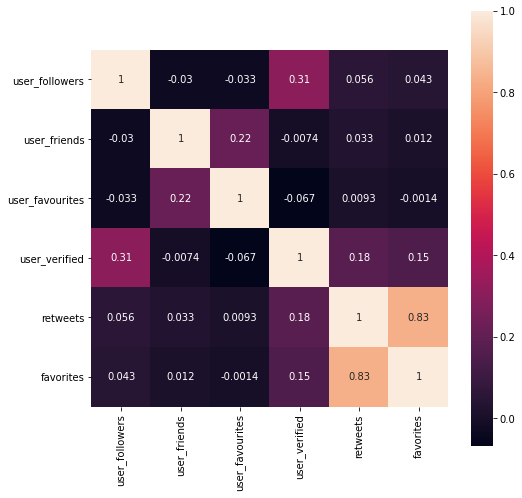

In [70]:
plt.figure(figsize=(8,8))
sns.heatmap(df.drop(columns=['id','is_retweet']).corr(), square=True, annot=True)
plt.show()

# User folowers

In [130]:
user_followers = df.sort_values(by=['user_followers'],ascending=False)
data = user_followers.drop(['id','user_created','is_retweet','favorites','user_favourites'], axis = 1)

In [131]:
# data = data.set_index(keys='unique')

In [ ]:
# data.to_csv('tweet_sorted.csv',index=None)

# Data preprocessing

In [135]:
df1 = pd.read_csv('tweet_sorted.csv')

In [137]:
df1.head(3)

,user_name,user_location,user_description,user_followers,user_friends,user_verified,date,text,hashtags,source,retweets
0,CGTN,"Beijing, China",CGTN is an international media organization. I...,13714928,69,True,2020-12-25 00:38:07,The #French National Authority for Health said...,"['French', 'vaccine']",Twitter Web App,12
1,ABP News,India,Follow for latest news alerts from India,10741934,67,True,2021-01-01 03:07:10,#WHO Grants 'Emergency Validation' For #Pfizer...,"['WHO', 'PfizerBioNTech', 'CovidVaccine']",Twitter Web App,1
2,The Hindu,"Chennai, India",News feeds from India's National Newspaper,6569222,212,True,2020-12-22 07:40:00,The U.S. began administering vaccines a week a...,['PfizerBioNTech'],TweetDeck,0


In [139]:
df1.shape

(2978, 11)